In [2]:
#First I need to import everything
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [3]:
#Now I need to create the dataframe for the dataset.
df = pd.read_csv('Hotel Reservations.csv', index_col=0)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
#Now to clean the data, first check to see if there's any NaN values
#df.isna()
#There are none, now looking at the dataset I need to see which columns
    #have non-numeric values
#df.info()
#df.select_dtypes("object").nunique().sort_values()
#The columns that need adjusting are, those being type_of_meal_plan,
    #room_type_reserved, market_segment_type, and booking_status
#Now time to make a dummy frame
dummy_frame = pd.get_dummies(df, drop_first=False, dtype="int64")

#dummy_frame.info()

#dummy_frame.head()

#Because booking_status_Canceled and booking_status_Not_Canceled
    #tell the same information I will drop booking_status_Not_Canceled
dummy_frame.drop('booking_status_Not_Canceled', axis=1, inplace=True)

In [5]:
#Now to make X and y
y = dummy_frame['booking_status_Canceled']
X = dummy_frame.drop('booking_status_Canceled', axis=1)
print(y.head())
X.head()

Booking_ID
INN00001    0
INN00002    0
INN00003    1
INN00004    1
INN00005    1
Name: booking_status_Canceled, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
INN00002,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
INN00003,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
INN00004,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
INN00005,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Now to make the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                   train_size=0.75, 
                                                   random_state=42)

In [7]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)


RandomForestRegressor()

In [8]:
random_forest.score(X_train, y_train)
random_forest.score(X_test, y_test)
#With this first try the model is far too overfitted

0.6749107426441641

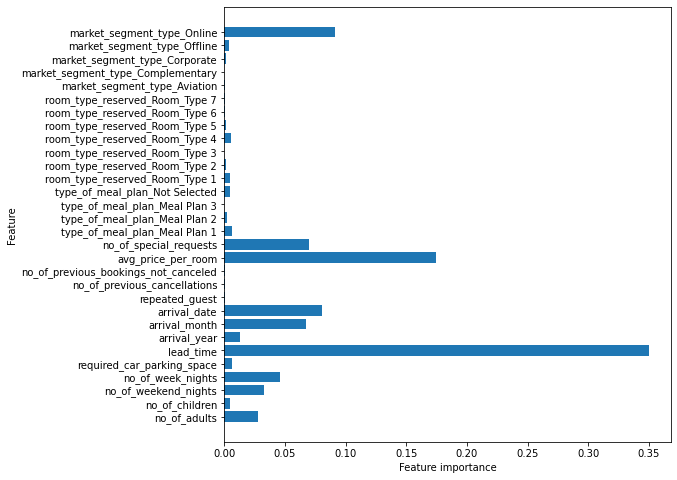

In [9]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

plot_feature_importances(random_forest)

In [10]:
bag_forest = BaggingRegressor()
bag_forest.fit(X_train, y_train)

BaggingRegressor()

In [12]:
bag_forest.score(X_train, y_train)
bag_forest.score(X_test, y_test)

0.6466277580019111

In [15]:
#Since both the forests at the default perform poorly with the test data
    #both need tuning.
#I will start with adjusting the max_depth to 6 and doubling the number of
    #trees.
random_forest2 = RandomForestRegressor(n_estimators=200, max_depth=6)
random_forest2.fit(X_train, y_train)
random_forest2.score(X_train, y_train)
random_forest2.score(X_test, y_test)

#This performs far, far worse than before


0.508000573548198

In [17]:
random_forest3 = RandomForestRegressor(n_estimators=200, max_depth=10)
random_forest3.fit(X_train, y_train)
random_forest3.score(X_train, y_train)
random_forest3.score(X_test, y_test)

#So the depth still isn't enough

0.6198303880300262

In [20]:
#Let's actually take a look at the features of the random forest
random_forest.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_features='auto', random_state=626610453),
 DecisionTreeRegressor(max_features='auto', random_state=1650906866),
 DecisionTreeRegressor(max_features='auto', random_state=1879422756),
 DecisionTreeRegressor(max_features='auto', random_state=1277901399),
 DecisionTreeRegressor(max_

In [21]:
#Let's just try the random_forest with a lot more trees
random_forest4 = RandomForestRegressor(n_estimators=1000)

In [22]:
random_forest4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [23]:
random_forest4.score(X_train, y_train)

0.9405861069677598

In [24]:
random_forest4.score(X_test, y_test)
#That did nothing

0.6776531571189247